In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')
import os

In [3]:
output_folder=r"C:\Users\E284652\Documents\repos\pypvcircuit_output"

In [4]:
import unittest
from pypvcell.solarcell import SQCell, MJCell

from pypvcircuit.spice_module_solver import SingleModuleStringSolver, MultiStringModuleSolver,ModuleErr
from pypvcell.illumination import load_astm
import pypvcell.fom as fom

import matplotlib.pyplot as plt
import numpy as np

from pypvcircuit.parse_spice_input import NodeReducer

In [5]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

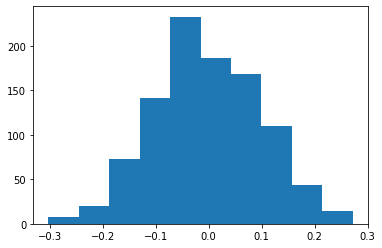

In [6]:
plt.hist(s)
plt.show()

## Investigate the output power of 5x5 module versus the module

In [7]:
gaas_1j = SQCell(1.42, 300, 1)
ingap_1j = SQCell(1.87, 300, 1)
ge_1j = SQCell(0.7, 300, 1)

mj_cell = MJCell([ingap_1j, gaas_1j, ge_1j])

nd = NodeReducer()

stdev = 0.02

cell_num_array = np.arange(1,20,2)
assemling_err_array=np.linspace(0,0.5,5)
tracker_error=0.3
acceptance_angle=0.7

trial = 50
pm_store = np.empty((assemling_err_array.shape[0], trial))
isc_store = np.empty((assemling_err_array.shape[0], trial))
voc_store = np.empty((assemling_err_array.shape[0], trial))
ff_store = np.empty((assemling_err_array.shape[0], trial))

for std_index, assembling_err in enumerate(assemling_err_array):

    for tt in range(trial):
        test_string_num=5
        cell_num=5
        
        
        me=ModuleErr(assembling_err,-assembling_err,tracker_error,cell_num*test_string_num,acceptance_angle)
        isc_stdev=me.get_isc(1.0)
        #print(isc_stdev)
        sm = MultiStringModuleSolver(solarcell=mj_cell, illumination=500,
                                     v_start=0, v_end=3.5 * cell_num, v_steps=0.05, l_r=1e-3, l_c=1e-3,
                                     cell_number=cell_num, string_number=test_string_num, isc_stdev=isc_stdev,
                                     spice_preprocessor=None)

        # print(sm._generate_network())

        sm._solve_circuit()
        calc_isc=fom.isc(sm.V, sm.I)/test_string_num
        max_p = fom.max_power(sm.V, sm.I) / (cell_num * test_string_num)
        voc_p=fom.voc(sm.V,sm.I)/cell_num
        ff_p=fom.ff(sm.V,sm.I)
        plt.plot(sm.V,sm.I)
        plt.ylim(top=0)
        
        fname="{}_{}.png".format(std_index,tt)
        
        plt.savefig(os.path.join(output_folder,fname))
        plt.close()
        
        
        pm_store[std_index, tt] = max_p
        isc_store[std_index,tt] = calc_isc
        voc_store[std_index,tt]=voc_p
        ff_store[std_index,tt]=ff_p

In [8]:
from pypvcell.illumination import load_astm
mj_cell.set_input_spectrum(load_astm("AM1.5g")*500)

(array([1., 0., 0., 1., 2., 1., 2., 7., 3., 8.]),
 array([0.57324801, 0.61503816, 0.6568283 , 0.69861844, 0.74040859,
        0.78219873, 0.82398887, 0.86577902, 0.90756916, 0.9493593 ,
        0.99114945]),
 <a list of 10 Patch objects>)

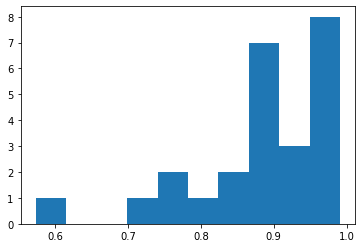

In [9]:
plt.hist(isc_stdev)

In [10]:
normal_p=mj_cell.get_eta()*1e-6*500*1000
normal_p

0.23228764743850291

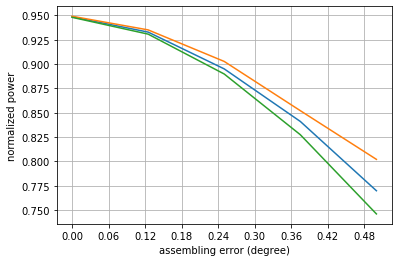

In [11]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(assemling_err_array, pm_store.mean(axis=1)/normal_p)
#plt.plot(cell_num_array, pm_store.max(axis=1)/normal_p)
ax.plot(assemling_err_array, np.percentile(pm_store/normal_p,75,axis=1))
ax.plot(assemling_err_array, np.percentile(pm_store/normal_p,25,axis=1))

#plt.axhline(1.0)
ax.set_xlabel("assembling error (degree)")
ax.set_ylabel("normalized power")
plt.grid()
plt.show()

In [12]:
cell_num_array.dtype

dtype('int32')

In [22]:
gaas_1j = SQCell(1.42, 300, 1)
ingap_1j = SQCell(1.87, 300, 1)
ge_1j = SQCell(0.7, 300, 1)

mj_cell = MJCell([ingap_1j, gaas_1j, ge_1j])

nd = NodeReducer()

stdev = 0.02

cell_num_array = np.arange(1,20,2)
assemling_err_array=np.linspace(0,0.5,5)
tracker_error=0.3
acceptance_angle=0.7

trial = 50
pm_store = np.empty((cell_num_array.shape[0], trial))
isc_store = np.empty((cell_num_array.shape[0], trial))
voc_store = np.empty((cell_num_array.shape[0], trial))
ff_store = np.empty((cell_num_array.shape[0], trial))

for std_index, cell_num in enumerate(cell_num_array):

    for tt in range(trial):
        test_string_num=5
        
        assembling_arr=0.05
        
        me=ModuleErr(assembling_err,-assembling_err,tracker_error,cell_num*test_string_num,acceptance_angle)
        isc_stdev=me.get_isc(1.0)
        #print(isc_stdev)
        sm = MultiStringModuleSolver(solarcell=mj_cell, illumination=500,
                                     v_start=0, v_end=3.5 * cell_num, v_steps=0.05, l_r=1e-3, l_c=1e-3,
                                     cell_number=cell_num, string_number=test_string_num, isc_stdev=isc_stdev,
                                     spice_preprocessor=None)

        # print(sm._generate_network())

        sm._solve_circuit()
        calc_isc=fom.isc(sm.V, sm.I)/test_string_num
        max_p = fom.max_power(sm.V, sm.I) / (cell_num * test_string_num)
        voc_p=fom.voc(sm.V,sm.I)/cell_num
        ff_p=fom.ff(sm.V,sm.I)
        plt.plot(sm.V,sm.I)
        plt.ylim(top=0)
        
        fname="{}_{}.png".format(std_index,tt)
        
        plt.savefig(os.path.join(output_folder,fname))
        plt.close()
        
        
        pm_store[std_index, tt] = max_p
        isc_store[std_index,tt] = calc_isc
        voc_store[std_index,tt]=voc_p
        ff_store[std_index,tt]=ff_p

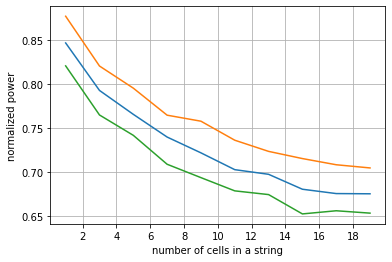

In [23]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(cell_num_array, pm_store.mean(axis=1)/normal_p)
#plt.plot(cell_num_array, pm_store.max(axis=1)/normal_p)
ax.plot(cell_num_array, np.percentile(pm_store/normal_p,75,axis=1))
ax.plot(cell_num_array, np.percentile(pm_store/normal_p,25,axis=1))

#plt.axhline(1.0)
ax.set_xlabel("number of cells in a string")
ax.set_ylabel("normalized power")
plt.grid()
plt.show()

In [19]:
0.69/0.76

0.9078947368421052

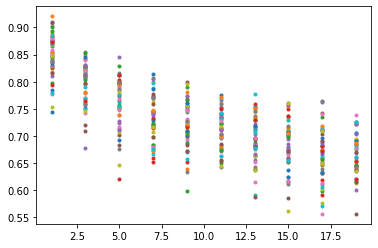

In [16]:
plt.plot(cell_num_array, pm_store/normal_p,'.')
plt.show()

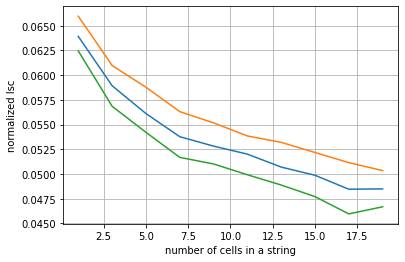

In [18]:
plt.plot(cell_num_array, -isc_store.mean(axis=1))
plt.plot(cell_num_array, np.percentile(-isc_store,75,axis=1))
plt.plot(cell_num_array, np.percentile(-isc_store,25,axis=1))

#plt.axhline(1.0)
plt.xlabel("number of cells in a string")
plt.ylabel("normalized Isc")
plt.grid()
plt.show()